# Extract mentions and hashtags from tweets

Extract hashtags and tweets from your twitter data with regex. This is a helpful first step in topic identification.

In [2]:
%%capture 
!pip install wordcloud
# Load packages
import pandas as pd 
import nltk
from collections import Counter
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Upload your data as a csv or json file and load it as a data frame 
try:
    df = pd.read_csv('puyallupTweets-Analysis.csv')
except:
    df = pd.read_json('twitter.json', orient='index').T

df.head()

,date,from,text
0,2022-03-08T03:48:00.000Z,NaN,The City is accepting applications for a Payro...
1,2022-03-07T03:42:00.000Z,NaN,The Meridian Streetscapes Project page on our ...
2,2022-03-06T01:26:00.000Z,NaN,"With spring around the corner, now is a good t..."
3,2022-03-05T02:58:00.000Z,NaN,Join the Pierce Conservation District on March...
4,2022-03-03T17:42:00.000Z,NaN,The City of Puyallup is now on LinkedIn. Pleas...


In [6]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"(@\w+)"

hashtags = []
mentions = []
for tweet in df['text']:
    hashtags.append(nltk.tokenize.regexp_tokenize(tweet, pattern1))
    mentions.append(regexp_tokenize(tweet, pattern2))

df['mentions'] = mentions
df['hashtags'] = hashtags
df.head()
print(df['hashtags'])


0              []
1              []
2              []
3              []
4              []
          ...    
3194           []
3195    [#wasnow]
3196           []
3197           []
3198           []
Name: hashtags, Length: 3199, dtype: object


In [7]:
##df.to_csv(index=False)
display(df)
df.dtypes


def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count


atList = []
for x in df['mentions']:
    for i in x:
        atList.append(i)
        
##print(atList)
occurrences = Counter(atList)
print(occurrences)

,date,from,text,mentions,hashtags
0,2022-03-08T03:48:00.000Z,NaN,The City is accepting applications for a Payro...,[],[]
1,2022-03-07T03:42:00.000Z,NaN,The Meridian Streetscapes Project page on our ...,[],[]
2,2022-03-06T01:26:00.000Z,NaN,"With spring around the corner, now is a good t...",[],[]
3,2022-03-05T02:58:00.000Z,NaN,Join the Pierce Conservation District on March...,[],[]
4,2022-03-03T17:42:00.000Z,NaN,The City of Puyallup is now on LinkedIn. Pleas...,[],[]
...,...,...,...,...,...
3194,2012-01-18T19:07:08.000Z,NaN,Puyallup City Hall to close at 3pm today. Ther...,[],[]
3195,2012-01-18T19:05:09.000Z,NaN,RT @wsdot: Cliff says the Western WA snow shou...,[@wsdot],[#wasnow]
3196,2012-01-18T19:04:19.000Z,NaN,@ilymrgaspi What area? I'll try and get you so...,[@ilymrgaspi],[]
3197,2012-01-18T19:03:07.000Z,NaN,"@holliejo Love it! ""Snow fashion = NO fashion""...",[@holliejo],[]


Counter({'@PuyallupPD': 180, '@PierceCo': 89, '@CityofPuyallup': 70, '@PuyallupLibrary': 57, '@WAStateFair': 43, '@CentralPierce': 36, '@CityOfSumnerWA': 36, '@PuyallupSD': 36, '@PSETalk': 26, '@TPCHD': 25, '@wsdot_tacoma': 24, '@wsdot': 22, '@piercecollege': 20, '@ci': 17, '@CPFR_PIO': 15, '@waEMD': 15, '@SoundsFunMom': 15, '@puyallupwa': 13, '@WADeptHealth': 13, '@thenewstribune': 13, '@waDNR': 12, '@WSUPuyallupREC': 11, '@geezfools': 11, '@ChrisEgan5': 10, '@PierceCountyAud': 10, '@wspd1pio': 9, '@soundtransit': 9, '@SoundTransit': 9, '@PierceTransit': 9, '@pscleanair': 9, '@dude463_waze': 9, '@Swasian': 9, '@YouTube': 8, '@Chrisinsumner': 8, '@PHSVIKS': 8, '@TravelTacoma': 8, '@techdir': 8, '@PuyallupMainST': 7, '@NWSSeattle': 7, '@KIRO7Seattle': 7, '@wafoodtrucks': 6, '@tntdiner': 6, '@PuyallupNews': 6, '@mtbrideleader': 6, '@PuyallupWAPatch': 6, '@TerriSilowka': 6, '@Q13FOX': 6, '@BracingWeather': 6, '@soundsfunmom': 6, '@puyallupcom': 5, '@PuyallupKOMO': 5, '@BossMamasTruck': 5,

In [8]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count


atList = []
for x in df['hashtags']:
    for i in x:
        atList.append(i)
        
##print(atList)
occurrences2 = Counter(atList)
print(occurrences2)


Counter({'#Puyallup': 293, '#COVID19': 21, '#PuyallupProud': 13, '#EmergencyPreparedness': 13, '#puyallup': 12, '#PierceCounty': 9, '#TrafficAlert': 8, '#Sumner': 7, '#TBT': 7, '#wawx': 5, '#ThrowbackThursday': 4, '#GoCougs': 4, '#PartyBigWA': 4, '#ourpuyallup': 4, '#MaskUpWA': 4, '#Tacoma': 4, '#s': 4, '#Puyallup125': 4, '#puyallupfire': 3, '#PierceCo': 3, '#GoViks': 3, '#PNW': 3, '#StopOnRed2012': 3, '#WaSnow': 3, '#wasnow': 3, '#centralpiercefire': 2, '#PierceCountyWA': 2, '#WSU': 2, '#MaskUpPierceCounty': 2, '#GeneralElection': 2, '#WithYouPuyallup': 2, '#ThankYou': 2, '#MtRainier': 2, '#maskingforafriend': 2, '#SupportLocal': 2, '#SouthSound': 2, '#EarthDay2020': 2, '#library': 2, '#Election': 2, '#home': 2, '#LibrariesRock': 2, '#JBLM': 2, '#freebie': 2, '#GoHawks': 2, '#FirstMondayoftheMonth': 2, '#FF': 2, '#WorkingTogether': 2, '#Auburn': 1, '#CityView': 1, '#nationalstickerday': 1, '#TargetZero': 1, '#TogetherWeGetThere': 1, '#DriveSoberOrGetPulledOver': 1, '#DaffodilFestival'

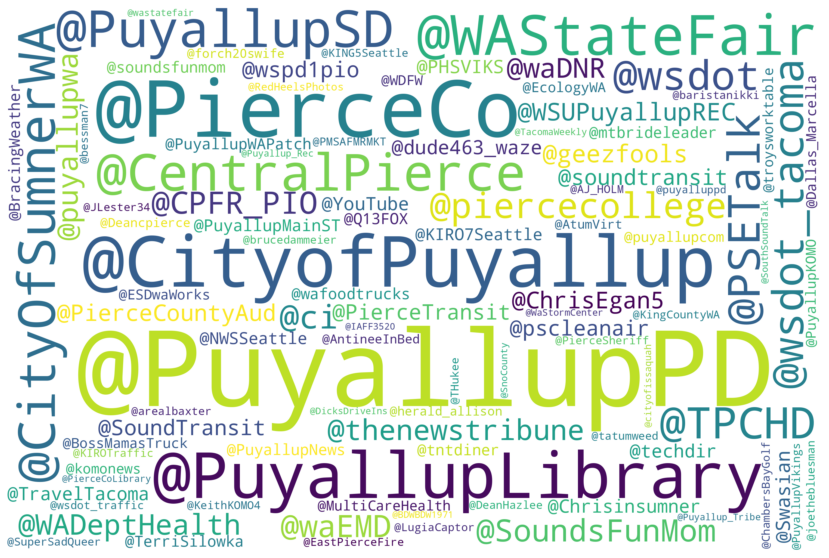

In [23]:

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
wordcloud = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=100)
wordcloud.generate_from_frequencies(frequencies=occurrences)

plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wordcloud, interpolation="bilinear")    # plot the wordcloud
plt.axis("off")                                    # remove plot axes
plt.savefig('wordcloud.png')                       # save as png

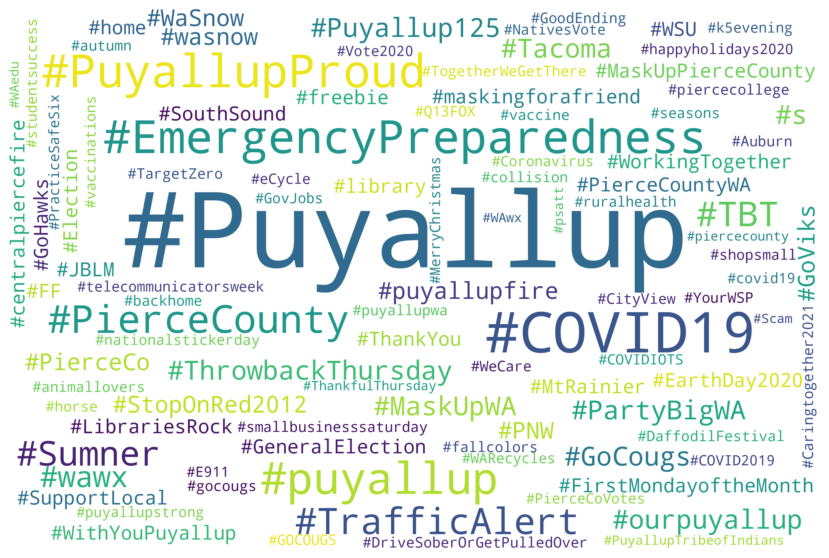

In [24]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
wordcloud = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=100)
wordcloud.generate_from_frequencies(frequencies=occurrences2)

plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wordcloud, interpolation="bilinear")    # plot the wordcloud
plt.axis("off")                                    # remove plot axes
plt.savefig('wordcloud2.png')                       # save as png